In [2]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
from graph_from_skeleton.graph_from_skeleton import *
from graph_from_skeleton.utils import *
%matplotlib inline

In [3]:
def plot_graph_3d(graph, node_size=2.2, font_size=-1, 
               node_color='r', edge_color='r', 
               linewidths=2, offset=np.array([0,0]), **kwargs):
  
    pos = dict({n:graph.nodes[n]['pos'][:2]+offset for n in graph.nodes()})
    nx.draw_networkx(graph, pos=pos, node_size=node_size, node_color=node_color,
                     edge_color=edge_color, font_size=font_size, **kwargs)
#     plt.gca().invert_yaxis()

In [4]:
pred_graph = load_graph_txt("../DemoData/demo_graph.txt")

In [5]:
## Adding edge lengths to edge data
for n1, n2, d in pred_graph.edges(data=True):
    pos1 = np.array(pred_graph.nodes[n1]["pos"])
    pos2 = np.array(pred_graph.nodes[n2]["pos"])
    
    d["length"] = np.linalg.norm(pos1-pos2)

In [6]:
no_loops = nx.minimum_spanning_tree(pred_graph)

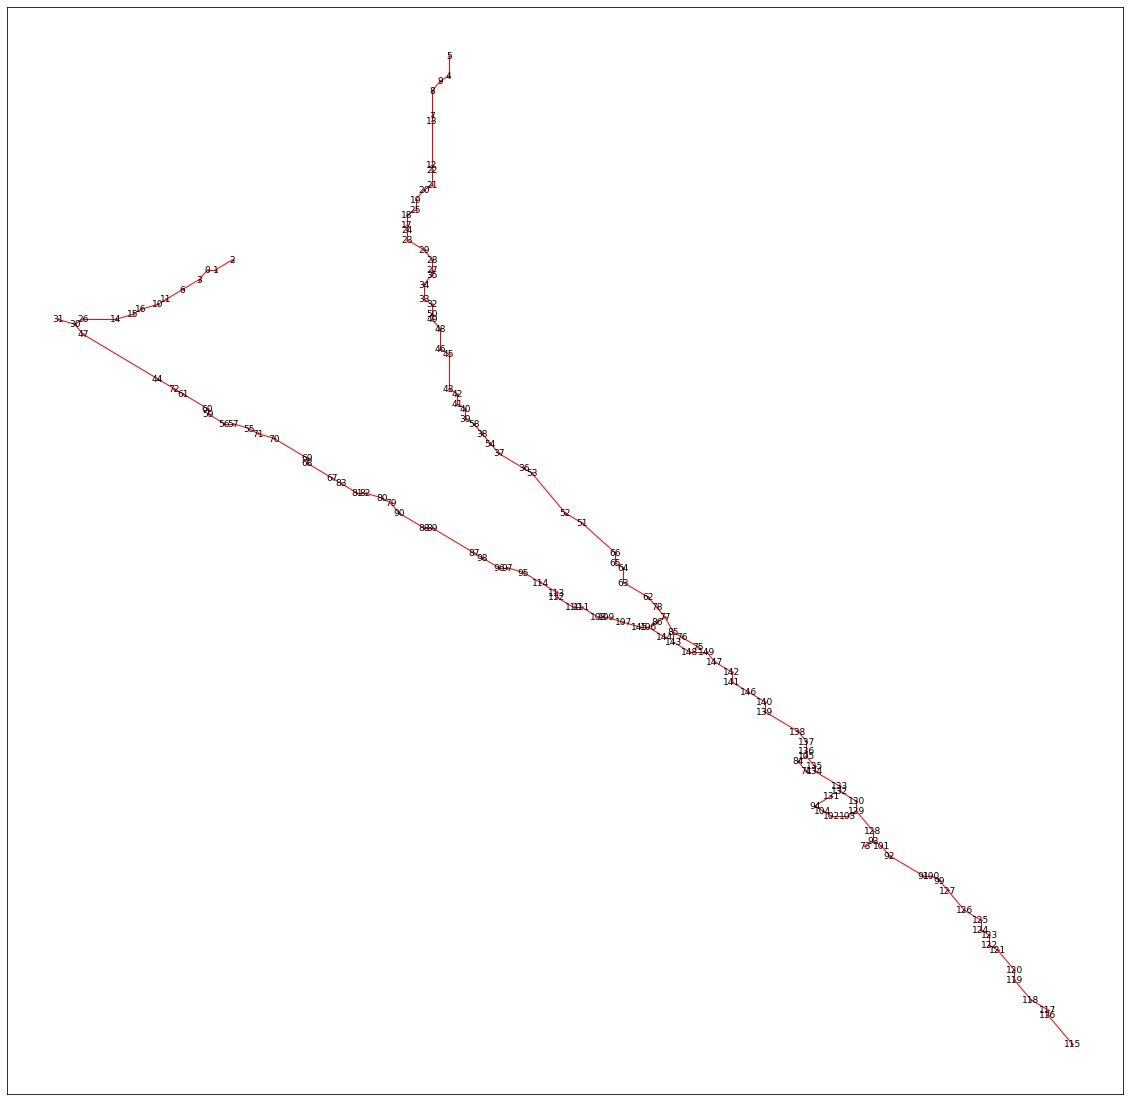

In [7]:
%matplotlib inline
plt.figure(figsize=(20,20))
plot_graph_3d(no_loops, font_size=9)

In [8]:
## Finding neighbors of each node
neighbors = {}
for n in no_loops.nodes:
    neighbors[n] = list(no_loops.neighbors(n))

In [9]:
## Removing small branches

In [10]:
# Find bifurcation points
bif_nodes = []
for k,v in neighbors.items():
    if len(v) > 2:
        bif_nodes.append(k)

In [11]:
# Remove the edges around the bifurcation nodes
prune_th = 8
pruned_graph = no_loops.copy()

for n in bif_nodes:
    T = no_loops.copy()
    T.remove_node(n)
    
    subgraphs = list(nx.connected_components(T))
    subgraphs.sort(key=len, reverse=True)
    
    for sg in subgraphs:
        if len(sg) < prune_th:
            pruned_graph.remove_nodes_from(sg)

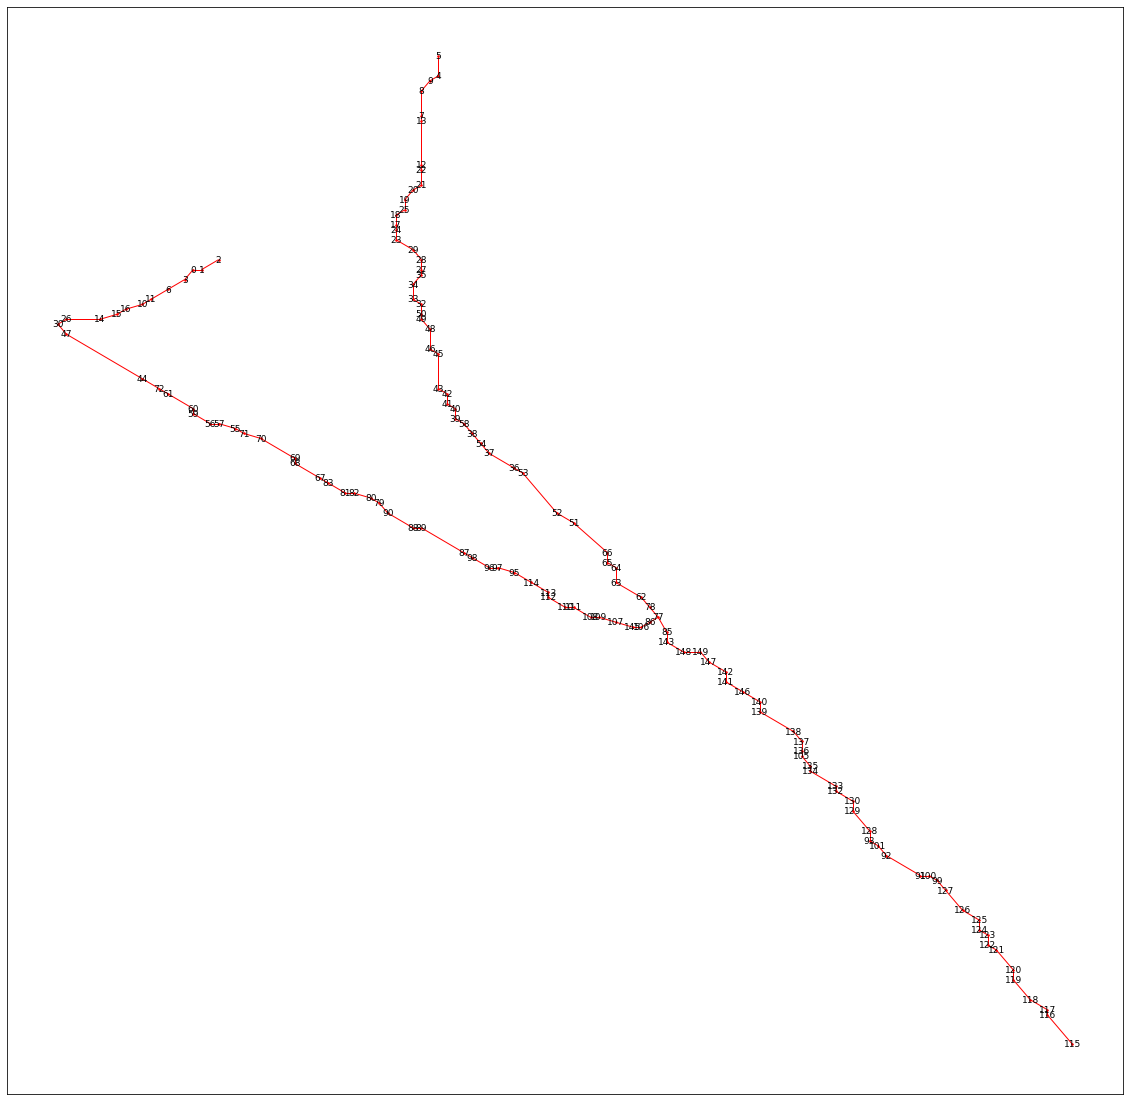

In [12]:
%matplotlib inline
plt.figure(figsize=(20,20))
plot_graph_3d(pruned_graph, font_size=9)